In [3]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA, TruncatedSVD
import warnings
warnings.filterwarnings("ignore")

In [4]:
#import the original data; the data is extracted from World Bank World Development Indicators
wdi = pd.read_csv("data/Selected Datav1.csv")
wdi.head(n =25)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,4.779008e+01,4.755839e+01,4.732760e+01,4.709162e+01,4.684421e+01,4.657710e+01,...,2.749600e+01,2.751344e+01,2.748487e+01,2.738930e+01,2.721144e+01,2.694078e+01,2.657699e+01,2.613480e+01,2.564802e+01,NaN
1,Arab World,ARB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.977256e+00,6.998635e+00,7.018725e+00,7.035036e+00,7.045690e+00,7.049042e+00,...,3.475024e+00,3.470384e+00,3.463100e+00,3.450654e+00,3.430464e+00,3.402059e+00,3.365221e+00,3.322465e+00,3.276553e+00,NaN
2,Arab World,ARB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.283168e-01,4.772079e+00,3.629086e+00,6.656678e+00,3.166151e+00,2.455201e+00,3.307618e+00,3.247325e+00,9.998818e-01,2.096747e+00
3,Arab World,ARB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.363818e+04,1.412554e+04,1.451643e+04,1.542068e+04,1.582148e+04,1.615147e+04,1.650069e+04,1.691102e+04,1.710213e+04,1.755781e+04
4,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.365192e+04,1.400315e+04,1.438016e+04,1.528592e+04,1.557512e+04,1.604909e+04,1.651546e+04,1.698540e+04,1.713191e+04,1.749890e+04
5,Arab World,ARB,Population ages 65 and above (% of total popul...,SP.POP.65UP.TO.ZS,3.507922e+00,3.539326e+00,3.564483e+00,3.583551e+00,3.596393e+00,3.603238e+00,...,4.123422e+00,4.133051e+00,4.152697e+00,4.175251e+00,4.204198e+00,4.244906e+00,4.301047e+00,4.374559e+00,4.461560e+00,4.557876e+00
6,Arab World,ARB,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,8.430860e+00,8.663154e+00,8.903441e+00,9.152526e+00,9.410965e+00,...,3.085858e+01,3.159402e+01,3.233012e+01,3.306767e+01,3.380379e+01,3.453398e+01,3.525690e+01,3.596876e+01,3.666980e+01,3.737237e+01
7,Arab World,ARB,Population growth (annual %),SP.POP.GROW,NaN,2.740584e+00,2.755287e+00,2.773671e+00,2.797625e+00,2.823683e+00,...,2.433025e+00,2.383187e+00,2.329922e+00,2.281329e+00,2.224341e+00,2.160102e+00,2.093418e+00,2.019087e+00,1.949024e+00,1.915912e+00
8,Arab World,ARB,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,5.041523e+01,5.041499e+01,5.041299e+01,5.040983e+01,5.040639e+01,5.040350e+01,...,5.161105e+01,5.167011e+01,5.170547e+01,5.172105e+01,5.172522e+01,5.172913e+01,5.173987e+01,5.175959e+01,5.178476e+01,5.180967e+01
9,Arab World,ARB,"Population, total",SP.POP.TOTL,9.219775e+07,9.472451e+07,9.733444e+07,1.000342e+08,1.028328e+08,1.057364e+08,...,3.466292e+08,3.548900e+08,3.631587e+08,3.714435e+08,3.797057e+08,3.879077e+08,3.960283e+08,4.040244e+08,4.118990e+08,4.197906e+08


In [6]:
wdi.describe()
wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 63 columns):
Country Name      3959 non-null object
Country Code      3959 non-null object
Indicator Name    3959 non-null object
Indicator Code    3959 non-null object
1960              2179 non-null float64
1961              2856 non-null float64
1962              2859 non-null float64
1963              2857 non-null float64
1964              2858 non-null float64
1965              2858 non-null float64
1966              2868 non-null float64
1967              2871 non-null float64
1968              2872 non-null float64
1969              2876 non-null float64
1970              2881 non-null float64
1971              2894 non-null float64
1972              2896 non-null float64
1973              2895 non-null float64
1974              2895 non-null float64
1975              2898 non-null float64
1976              2905 non-null float64
1977              2905 non-null float64
1978             

From the results above, we can see that there are 180 countries in the dataset. We need to find the countries that are both in the suicide dataset as well as not missing too many values. The following codes do the work. 

In [7]:
#looking into countries data integrity
country_num = 180
country_list = []
country_remove_name = []
for i in range(country_num):
    country_list.append(wdi[wdi["Country Code"] == wdi.iloc[22*i+1,1]])
for i, cou in enumerate(country_list):
    #get null values, and remove ones with high sum by deleting country_num numbers
    if cou.isnull().sum().sum()>400:
        #print(i,":",cou.iloc[0,0],":",cou.isnull().sum().sum()) 
        country_remove_name.append(cou.iloc[0,0])
country_filtered = []
#filter out countirs
for i in country_list:
    if i.iloc[0,0] not in country_remove_name:
        country_filtered.append(i)
wdi_filtered = pd.concat(country_filtered)

In [8]:
var_original_num = 22
var_num = [0,1,4,5,6,7,10,11,12,13,14,15,17,19,21]
var_name = []
filtered_data = []
for i in range(var_original_num):
    if i not in var_num:
        var_name.append(wdi_filtered.iloc[i,3])

#needs to deal with missing values in gdp pp,gni pp, unemployment rate.

In [9]:
#after some manipualtions in Excel, read in our processed data
df = pd.read_csv('data/Selected Data-countryvariablefinal.csv')

#drop country code and index code
df.rename(columns={'Country Code': 'Country_Code', 'Index Code':'Index_Code'}, inplace=True)
df.drop("Country_Code",axis=1, inplace=True)
df.drop("Index_Code",axis=1, inplace=True)
#check na values
df.isnull().sum().sum()
#fill na values with linear trend
df = df.interpolate()
df.fillna(method = 'bfill',inplace = True)
df.head(n = 20)

,Country,Index,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Antigua and Barbuda,Age dependency ratio (% of working-age populat...,89.467973,89.841916,90.284877,90.838718,91.466534,92.137480,92.318803,92.727216,...,47.206761,46.408316,46.012400,45.515854,45.019491,44.621346,44.365241,44.441728,44.523535,44.677846
1,Antigua and Barbuda,"Birth rate, crude (per 1,000 people)",32.829000,32.500000,32.141000,31.752000,31.330000,30.858000,30.320000,29.698000,...,16.749000,16.547000,16.396000,16.272000,16.152000,16.026000,15.883000,15.717000,15.530000,31.428781
2,Antigua and Barbuda,"Fertility rate, total (births per woman)",4.425000,4.386000,4.344000,4.299000,4.250000,4.193000,4.125000,4.042000,...,1.993000,1.988000,1.989000,1.993000,1.998000,2.001000,2.003000,2.003000,1.999000,18.179716
3,Antigua and Barbuda,GDP growth (annual %),4.378217,4.340845,4.300693,4.252873,4.198499,4.140525,4.090162,4.028381,...,-12.107536,-7.200024,-2.079127,3.506609,-0.103865,4.658127,4.025737,5.589741,3.032606,4.930651
4,Antigua and Barbuda,"GDP per capita, PPP (current international $)",4.331434,4.295689,4.257385,4.206747,4.146998,4.088050,4.055323,4.014762,...,21875.234790,20237.672770,19953.192770,20779.825030,20867.028460,22000.750280,22882.970220,24177.959720,25145.541230,26739.468190
5,Antigua and Barbuda,"GNI per capita, PPP (current international $)",4.284651,4.250534,4.214078,4.160620,4.095497,4.035575,4.020485,4.001144,...,20970.000000,19680.000000,19260.000000,19900.000000,19990.000000,20900.000000,21660.000000,22580.000000,23490.000000,25160.000000
6,Antigua and Barbuda,Population ages 65 and above (% of total popul...,4.237867,4.205378,4.170771,4.114493,4.043996,3.983100,3.985646,3.987525,...,7.224541,7.357886,7.475379,7.618711,7.784431,7.961150,8.156809,8.360574,8.575231,8.799826
7,Antigua and Barbuda,Population density (people per sq. km of land ...,2.964754,125.002273,126.911364,128.868182,131.002273,133.404546,136.170455,139.184091,...,197.150000,200.063636,202.847727,205.475000,207.990909,210.368182,212.650000,214.834091,216.877273,218.831818
8,Antigua and Barbuda,Population growth (annual %),1.691640,1.594433,1.515700,1.530112,1.642464,1.817153,2.052124,2.189001,...,1.567334,1.467064,1.382009,1.286879,1.217000,1.136487,1.078838,1.021844,0.946557,0.897185
9,Antigua and Barbuda,"Population, male (% of total population)",46.728368,46.808472,46.885352,46.976244,47.084541,47.205233,47.321071,47.447747,...,47.777919,47.845053,47.913725,47.975267,48.028631,48.078045,48.121747,48.157004,48.190726,48.211504


In [10]:
#I manually took out the data from 2015, and added some variables collected from other sources.
df_f = pd.read_csv('data.csv',index_col=0)
df_f.dropna(inplace= True)
df_f

,Age dependency ratio (% of working-age population),"Birth rate, crude (per 1,000 people)","Fertility rate, total (births per woman)","GDP per capita, PPP (current international $)","GNI per capita, PPP (current international $)",Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Population growth (annual %),"Population, male (% of total population)","Population, total",...,Urban population (% of total population),Education_Level,Literacy_Rate,Alcohol_consumption,Divorce_Rate,Female_Labor_Force,Annual_sunshine,Religion_rate,Average_yearly_temperature,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,56.815969,18.154,2.3460,18524.856760,17890.00000,10.195025,14.904302,0.752213,48.657258,40788453,...,90.849,19.42,98.00,9.8,2.70,42.050000,1984.010000,65.0,14.80,7.714000
Armenia,43.790819,15.304,1.7220,6565.678660,6890.00000,10.993845,101.064946,-0.373712,46.791939,2877319,...,63.440,46.70,99.70,5.5,1.00,45.991442,2457.500000,73.0,7.15,19.007999
Australia,47.948454,13.700,1.9280,39324.368950,37800.00000,13.376556,2.867859,1.555490,50.009156,22031750,...,85.182,47.70,99.80,10.6,2.00,46.372302,2746.770000,32.0,21.65,5.211000
Austria,48.181187,9.400,1.4400,42006.046880,42360.00000,17.798384,101.287430,0.240394,48.735658,8363404,...,57.399,30.60,99.00,11.6,1.80,46.626155,1644.150000,55.0,6.35,4.820000
"Bahamas, The",49.248171,15.045,1.8650,29099.057210,28500.00000,6.113675,35.458741,1.515331,48.461413,354942,...,82.427,31.30,99.00,4.4,1.00,47.152151,2878.400000,91.0,24.85,14.540000
Barbados,49.240128,11.748,1.6870,15942.746530,15550.00000,13.250937,656.118605,0.364679,47.986928,282131,...,31.870,15.70,99.60,9.6,1.60,49.313833,3028.000000,95.0,26.00,10.690000
Belgium,52.014428,11.900,1.8600,40051.955900,41310.00000,17.334027,359.827807,0.913639,49.109527,10895586,...,97.651,33.80,99.00,12.1,2.00,45.842453,1489.600000,33.0,9.55,8.292000
Belize,65.814278,23.402,2.6900,7688.617871,6930.00000,4.078905,14.136957,2.451470,50.029616,322464,...,45.228,5.40,99.00,6.8,0.58,40.139165,1915.900000,62.0,25.30,11.659000
Brazil,46.293300,15.327,1.7960,14320.372280,13900.00000,6.820809,23.415932,0.937957,49.325264,195713635,...,84.335,15.80,93.20,7.8,1.40,43.384777,2270.200000,87.0,24.95,7.726000


In [11]:
#test datafrmae is used to perform pre-analysis, which requires integers. 
df_f_test = df_f.astype('int32')

df_f_test.rename(columns={'Population growth (annual %)': 'pop_growth', 'Surface area (sq. km)':'area',
                          'Population density (people per sq. km of land area)':'density',
                         'Population, total': 'Popu','Age dependency ratio (% of working-age population)':'Age_dependency', 
                         'Birth rate, crude (per 1,000 people)':'Birth_rate',
                         'Fertility rate, total (births per woman)':'Fertility_rate',
                         'GDP growth (annual %)':'GDP_growth','GDP per capita, PPP (current international $)':'GDP_PP',
                         'GNI per capita, PPP (current international $)' : 'GNI_PP',
                 'Population ages 65 and above (% of total population)' : '65_up',
                 'Population, male (% of total population)':'Male_rate',
                 'Rural population (% of total population)':'Rural_popu',
                 'Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployment_rate',
                 'Urban population (% of total population)':'Urban_rate'}, inplace=True)

df_f.rename(columns={'Population growth (annual %)': 'pop_growth', 'Surface area (sq. km)':'area',
                          'Population density (people per sq. km of land area)':'density',
                         'Population, total': 'Popu','Age dependency ratio (% of working-age population)':'Age_dependency', 
                         'Birth rate, crude (per 1,000 people)':'Birth_rate',
                         'Fertility rate, total (births per woman)':'Fertility_rate',
                         'GDP growth (annual %)':'GDP_growth','GDP per capita, PPP (current international $)':'GDP_PP',
                         'GNI per capita, PPP (current international $)' : 'GNI_PP',
                 'Population ages 65 and above (% of total population)' : '65_up',
                 'Population, male (% of total population)':'Male_rate',
                 'Rural population (% of total population)':'Rural_popu',
                 'Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployment_rate',
                 'Urban population (% of total population)':'Urban_rate'}, inplace=True)
# df_f_test.drop("pop_growth",axis=1, inplace=True)
df_f_test.drop("area",axis=1, inplace=True)
# df_f_test.drop("density",axis=1, inplace=True)
df_f_test.drop("Popu",axis=1, inplace=True)
# df_f_test.drop("Age_dependency",axis=1, inplace=True)
df_f_test.drop("Rural_popu",axis=1, inplace=True)
# df_f_test.drop("Literacy_Rate",axis=1, inplace=True)

# df_f.drop("pop_growth",axis=1, inplace=True)
df_f.drop("area",axis=1, inplace=True)
# df_f.drop("density",axis=1, inplace=True)
df_f.drop("Popu",axis=1, inplace=True)
# df_f.drop("Age_dependency",axis=1, inplace=True)
df_f.drop("Rural_popu",axis=1, inplace=True)
# df_f.drop("Literacy_Rate",axis=1, inplace=True)
#df_f.drop("Divorce_Rate",axis=1, inplace=True)
#can still get rid of Age dependency ratio and 

In [12]:
#Adequency Test

#1,Bartlett test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df_f_test)
p_value#the p-value is approximately 0. 

#The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

4.935687004257076e-113

In [13]:
#2, Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis.
from factor_analyzer.factor_analyzer import calculate_kmo

calculate_kmo(df_f_test)
#The overall KMO for our data is 0.73, which is good. 

(array([0.43780629, 0.64820821, 0.79333546, 0.60271461, 0.59811987,
        0.69102356, 0.55557784, 0.8519856 , 0.77198443, 0.83444063,
        0.66392479, 0.66198847, 0.80469485, 0.76679262, 0.8618897 ,
        0.66214022, 0.77800378, 0.66869992, 0.40974304]), 0.689854598038107)

In [14]:
fa = FactorAnalyzer(20, rotation=None)
fa.fit(df_f)
#the resulting eigenvalues tells us that 4 or 5 factors are reasonable
#check Eigenvalues
fa.get_eigenvalues()

(array([6.45553893e+00, 3.51544326e+00, 2.11244728e+00, 1.24329885e+00,
        1.03205352e+00, 8.75501918e-01, 7.79399870e-01, 6.63775491e-01,
        5.36118873e-01, 4.12871264e-01, 3.50580952e-01, 2.75140639e-01,
        2.64212338e-01, 2.11154067e-01, 1.40297084e-01, 7.68972466e-02,
        4.10510267e-02, 1.08066108e-02, 3.41077902e-03]),
 array([ 6.40950325e+00,  3.48957390e+00,  2.05930022e+00,  1.07041558e+00,
         8.99016840e-01,  7.46341178e-01,  5.91973650e-01,  5.09631441e-01,
         4.22836677e-01,  3.47971244e-01,  2.71975017e-01,  1.89962052e-01,
         1.53318274e-01,  1.01802300e-01,  9.25430213e-02,  5.83482254e-02,
         2.16107083e-02,  4.45034024e-03, -1.13729538e-03]))

In [15]:
fa = FactorAnalyzer(n_factors=5, rotation='VARIMAX')
fa.fit(df_f)
fa.get_factor_variance()
#Total 72.9% cumulative Variance explained.

(array([3.91796624, 3.43488456, 2.87279511, 1.77834555, 0.89388176]),
 array([0.20620875, 0.1807834 , 0.15119974, 0.09359713, 0.04704641]),
 array([0.20620875, 0.38699215, 0.53819189, 0.63178902, 0.67883543]))

In [16]:
df = pd.DataFrame(data=fa.loadings_[:,:],    # values
             index=df_f.columns.values,    # 1st column as index
            columns=('1','2','3','4','5')) 

In [17]:
df

,1,2,3,4,5
Age_dependency,-0.126345,0.212949,-0.177225,-0.912237,0.151282
Birth_rate,-0.207839,0.906162,-0.169387,-0.318575,-0.055708
Fertility_rate,-0.080882,0.835704,-0.086585,-0.479776,-0.008834
GDP_PP,0.319224,-0.150707,0.833905,0.218651,0.236152
GNI_PP,0.306181,-0.139475,0.863999,0.205731,0.216045
65_up,0.512813,-0.782406,0.105545,-0.145753,0.034223
density,-0.189662,-0.065485,0.293299,0.434386,0.266738
pop_growth,-0.240914,0.677877,0.541821,-0.015032,0.028551
Male_rate,-0.314969,0.367902,0.782472,0.097518,-0.203142
Urban_rate,0.270629,-0.121085,0.461786,0.061246,0.433310


In [18]:
new_df = pd.DataFrame(fa.transform(df_f), index=df_f.index.values, columns =('Factor 1','Factor 2','Factor 3','Factor 4','Factor 5'))
#this is the df for clustering
new_df
new_nda = fa.transform(df_f)
new_nda

array([[ 0.20912357,  0.4891259 , -0.22850693, -1.12727444,  0.18105544],
       [ 0.39985854,  0.52263017, -1.72825667,  1.45568953,  0.28965854],
       [ 0.63118179,  0.21013289,  0.83738857,  0.23534242, -0.22405875],
       [ 0.60994901, -1.14496701,  0.69443478, -0.2295095 , -0.04502671],
       [-0.88878562,  0.1134639 , -0.23397949,  0.89858014,  1.43630541],
       [-0.79335818, -1.13909339, -0.73611652,  0.02904373, -0.76299349],
       [ 1.10165643, -0.46175276,  0.8958442 , -0.67233494,  0.25411281],
       [-0.93815133,  0.98887614, -0.34789996, -1.97339834, -0.2373359 ],
       [-1.02368535,  0.29638696, -0.39064652,  0.54124285, -0.06701345],
       [ 0.6740818 , -0.8369008 , -0.51106363, -0.05392897, -1.0109397 ],
       [ 0.88162457, -0.46265372,  0.61175218,  0.15003711,  0.24385201],
       [-0.07543549, -0.08475671, -0.55758008,  0.41307389,  0.22466548],
       [-1.02689978,  0.34872865, -0.67789966,  0.28854202,  0.52170948],
       [-1.13121987,  0.21461291, -0.2

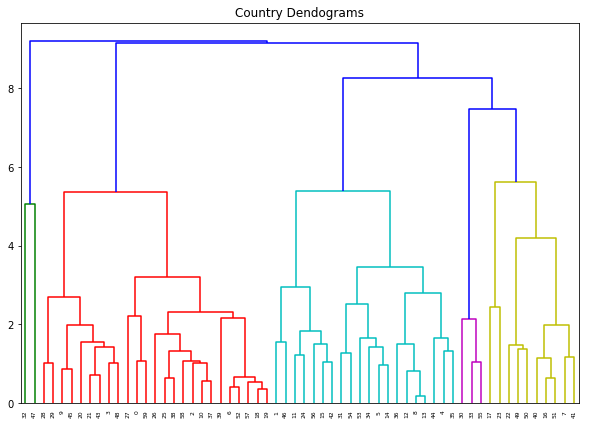

In [54]:
#hierarical clustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Country Dendograms")
dend = shc.dendrogram(shc.linkage(new_nda, method='ward'))

In [55]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

cluster_test = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_test.fit_predict(new_nda)


array([2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2,
       0, 0, 1, 2, 2, 2, 2, 2, 4, 1, 3, 4, 1, 1, 1, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 1, 3, 2, 0, 0, 0, 2, 1, 1, 4, 1, 2, 2, 2])

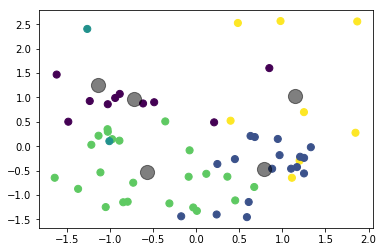

In [56]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(new_nda)
cluster_knn_y = kmeans.predict(new_nda)

plt.scatter(new_nda[:, 0], new_nda[:, 1], c=cluster_knn_y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [57]:
country_clusters = {}
for i in range(5):
    country_clusters[i] = []

for i,k in enumerate(cluster_knn_y):
    country_clusters[k].append(df_f.index.values[i])
country_clusters

cluster_df = pd.DataFrame(cluster_knn_y,  index=df_f.index.values, columns = ['factor'])
cluster_df.reset_index(level=0, inplace=True)


In [79]:
cluster0 = cluster_df[cluster_df["factor"] == 0]
cluster1 = cluster_df[cluster_df["factor"] == 1]
cluster2 = cluster_df[cluster_df["factor"] == 2]
cluster3 = cluster_df[cluster_df["factor"] == 3]
cluster4 = cluster_df[cluster_df["factor"] == 4]
# cluster5 = cluster_df[cluster_df["factor"] == 5]
cluster4

,index,factor
1,Armenia,4
15,Czech Republic,4
26,Ireland,4
30,Kazakhstan,4
33,Kyrgyzstan,4
46,Russian Federation,4
55,Turkmenistan,4
56,Ukraine,4


In [84]:
clustering_result = pd.DataFrame(index = [],columns=['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4'])
clustering_result['cluster3'] = pd.Series(cluster3['index'].values)
clustering_result['cluster0'] = pd.Series(cluster0['index'].values)
clustering_result['cluster1'] = pd.Series(cluster1['index'].values)
clustering_result['cluster2'] = pd.Series(cluster2['index'].values)
clustering_result['cluster4'] = pd.Series(cluster4['index'].values)
clustering_result.fillna('',inplace = True)
clustering_result
# frames = [cluster0, cluster1, cluster2, cluster3, cluster4]
# cluster_result = pd.merge(frames,)
# cluster_result

,cluster0,cluster1,cluster2,cluster3,cluster4
0,Argentina,Australia,Kuwait,"Bahamas, The",Armenia
1,Belize,Austria,Singapore,Barbados,Czech Republic
2,Ecuador,Belgium,,Brazil,Ireland
3,El Salvador,Canada,,Bulgaria,Kazakhstan
4,Guatemala,Finland,,Chile,Kyrgyzstan
5,Israel,France,,Colombia,Russian Federation
6,Mexico,Germany,,Costa Rica,Turkmenistan
7,Panama,Iceland,,Cuba,Ukraine
8,Paraguay,Italy,,Greece,
9,Suriname,Japan,,Grenada,


In [ ]:
import geopandas as gpd
#Read shapefile using Geopandas
gdf = gpd.read_file('data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
country = list(gdf["country"])
country.sort()
    
l = []
for c in df_f.index.values:
    if c not in country:
        l.append(c)

gdf.replace({'The Bahamas':'Bahamas, The', 'Czechia':'Czech Republic',
             'South Korea':'Korea, Rep.','Russia' :'Russian Federation', 
             'United States of America':'United States' }, inplace = True)
merged = gdf.merge(cluster_df, left_on = 'country', right_on = 'index')
merged 

,country,country_code,geometry,index,factor
0,Canada,CAN,"(POLYGON ((-122.84 49.00000000000011, -122.974...",Canada,0
1,United States,USA,"(POLYGON ((-122.84 49.00000000000011, -120 49....",United States,0
2,Kazakhstan,KAZ,"POLYGON ((87.35997033076265 49.21498078062912,...",Kazakhstan,1
3,Argentina,ARG,(POLYGON ((-68.63401022758323 -52.636370458874...,Argentina,0
4,Chile,CHL,(POLYGON ((-68.63401022758323 -52.636370458874...,Chile,2
5,Russian Federation,RUS,"(POLYGON ((178.7253 71.0988, 180.0000000000001...",Russian Federation,1
6,"Bahamas, The",BHS,"(POLYGON ((-78.98 26.79, -78.51000000000001 26...","Bahamas, The",2
7,Norway,NOR,"(POLYGON ((15.14282 79.67431000000001, 15.5225...",Norway,0
8,Mexico,MEX,POLYGON ((-117.1277599999999 32.53533999999996...,Mexico,2
9,Uruguay,URY,POLYGON ((-57.62513342958296 -30.2162948544542...,Uruguay,0


In [ ]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [ ]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][5]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 5)
#Define custom tick labels for color bar.
tick_labels = {'0': 'C1', '1': 'C2', '2':'C3', '3':'C4', '4':'C5','5':'C6'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=4,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Country Clustering', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'factor', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

suicide_ts = pd.read_csv("data/suicide rate 1985-2016.csv")

suicide_ts.rename(columns={'suicides/100k pop': 'suicide_rate'}, inplace=True)
suicide_ts.head(n = 15)

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [23]:
country_year_pop = suicide_ts.groupby(["country","year"]).population.sum().reset_index()
country_year_suicide_no = suicide_ts.groupby(["country","year"]).suicides_no.sum().reset_index()
country_year = country_year_pop.merge(country_year_suicide_no)
def get_rate(row):
    return row["suicides_no"]/row["population"]
country_year["suicide_rate"] = country_year.apply (lambda row: get_rate(row), axis=1)
country_year["suicide_rate_per_100k"] = country_year.apply (lambda row: 100000*row["suicide_rate"], axis=1)
country_year_s = country_year.pivot(index='country', columns='year', values='suicide_rate_per_100k')
country_year_ss = country_year_s.loc[country_year_s.isnull().mean(axis=1).lt(0.3)]

In [24]:
country_f = set(country_year_ss.index.values)
country_original = set(country_year_s.index.values)
country_removed = country_original - country_f
suicide_rate_finalized = country_year_ss.drop(index = 'Luxembourg')
suicide_rate_finalized = suicide_rate_finalized .drop(index = 'Guyana')
suicide_rate_finalized = suicide_rate_finalized .drop(index = 'Antigua and Barbuda')
# country_finalized.to_csv("finalized.csv", encoding='utf-8', index=True)
suicide_rate_finalized[2010]['Grenada'] = 3.17736
suicide_rate_finalized

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Argentina,7.338285,8.383374,8.282789,8.315670,7.828723,7.356202,6.586099,7.269000,7.316873,7.249799,...,8.112240,8.327544,7.761451,7.831615,7.659985,8.449141,7.686740,8.226282,7.740627,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,3.116935,2.476167,2.508538,3.148577,3.291697,...,2.595681,2.068700,1.970484,2.727723,2.509019,2.807092,2.383778,2.069190,2.647268,2.791628
Australia,12.779399,13.801672,14.382082,14.184860,13.268596,13.930537,14.289194,13.892060,12.449603,13.795062,...,11.294980,11.635008,11.383720,11.608080,11.454891,12.147517,12.073973,13.184305,13.610131,NaN
Austria,29.408807,30.045726,29.018208,25.908368,26.443136,25.237324,24.233780,23.849657,22.923040,23.798829,...,16.271442,15.986861,16.081755,15.862616,16.109775,15.887886,15.978484,16.140196,15.220115,16.046220
Bahamas,0.490918,NaN,1.358081,NaN,NaN,NaN,NaN,NaN,2.874743,1.203369,...,1.587357,1.244373,1.830312,2.995187,1.182092,1.455358,1.432833,NaN,NaN,NaN
Barbados,3.030303,3.454231,2.567394,5.110733,6.779661,6.751055,7.172996,5.833333,6.677796,5.826051,...,0.000000,0.385484,1.917781,1.145357,0.000000,0.000000,0.000000,NaN,NaN,NaN
Belgium,24.607319,23.710308,24.087049,21.417918,20.536516,20.224767,19.209076,19.919178,22.635767,22.437720,...,18.513966,19.790414,19.786961,19.713704,20.163927,19.401230,18.002785,17.950915,17.572830,NaN
Belize,NaN,2.043597,2.776447,NaN,0.653219,1.898734,1.233046,NaN,0.585480,4.681812,...,3.069050,4.097033,5.431064,5.285487,11.314467,6.021154,5.557590,7.673125,8.129192,NaN
Brazil,3.598944,3.595832,3.803864,3.552867,3.471252,3.655597,3.839685,3.800535,3.945121,4.146610,...,5.051537,5.174912,5.204669,5.191331,5.348029,5.547138,5.608164,5.616382,5.841839,NaN


In [25]:
#suicide_rate_finalized = suicide_rate_finalized.T

In [26]:
df= suicide_rate_finalized.fillna(method="bfill")
df.rename(index={'Bahamas':'Bahamas, The','Republic of Korea': 'Korea, Rep.','Saint Lucia': 'St. Lucia','Saint Vincent and Grenadines': 'St. Vincent and the Grenadines' }, inplace=True)

In [27]:
df= df.fillna(method="ffill")
df
# df_f_sb = df_f
# df_f_sb["rate"] = df[2010]
# df_f_sb["rate"]["Bahamas, The"] = 0.299519
# df_f_sb["rate"]["Korea, Rep."] = df[2010]["Republic of Korea"]
# df_f_sb["rate"]["Korea, Rep."] = df[2010]["Republic of Korea"]
# df_f_sb["rate"]["St. Lucia"] = df[2010]["Saint Lucia"]
# df_f_sb["rate"]["St. Vincent and the Grenadines"] = df[2010]["Saint Vincent and Grenadines"]

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Argentina,7.338285,8.383374,8.282789,8.315670,7.828723,7.356202,6.586099,7.269000,7.316873,7.249799,...,8.112240,8.327544,7.761451,7.831615,7.659985,8.449141,7.686740,8.226282,7.740627,2.791628
Armenia,12.779399,13.801672,14.382082,14.184860,13.268596,3.116935,2.476167,2.508538,3.148577,3.291697,...,2.595681,2.068700,1.970484,2.727723,2.509019,2.807092,2.383778,2.069190,2.647268,2.791628
Australia,12.779399,13.801672,14.382082,14.184860,13.268596,13.930537,14.289194,13.892060,12.449603,13.795062,...,11.294980,11.635008,11.383720,11.608080,11.454891,12.147517,12.073973,13.184305,13.610131,16.046220
Austria,29.408807,30.045726,29.018208,25.908368,26.443136,25.237324,24.233780,23.849657,22.923040,23.798829,...,16.271442,15.986861,16.081755,15.862616,16.109775,15.887886,15.978484,16.140196,15.220115,16.046220
"Bahamas, The",0.490918,3.454231,1.358081,5.110733,6.779661,6.751055,7.172996,5.833333,2.874743,1.203369,...,1.587357,1.244373,1.830312,2.995187,1.182092,1.455358,1.432833,17.950915,17.572830,14.759334
Barbados,3.030303,3.454231,2.567394,5.110733,6.779661,6.751055,7.172996,5.833333,6.677796,5.826051,...,0.000000,0.385484,1.917781,1.145357,0.000000,0.000000,0.000000,17.950915,17.572830,14.759334
Belgium,24.607319,23.710308,24.087049,21.417918,20.536516,20.224767,19.209076,19.919178,22.635767,22.437720,...,18.513966,19.790414,19.786961,19.713704,20.163927,19.401230,18.002785,17.950915,17.572830,14.759334
Belize,3.598944,2.043597,2.776447,3.552867,0.653219,1.898734,1.233046,3.800535,0.585480,4.681812,...,3.069050,4.097033,5.431064,5.285487,11.314467,6.021154,5.557590,7.673125,8.129192,14.759334
Brazil,3.598944,3.595832,3.803864,3.552867,3.471252,3.655597,3.839685,3.800535,3.945121,4.146610,...,5.051537,5.174912,5.204669,5.191331,5.348029,5.547138,5.608164,5.616382,5.841839,14.759334


In [28]:
#df_f.drop(index = "Grenada",inplace = True)
df_f

,Age_dependency,Birth_rate,Fertility_rate,GDP_PP,GNI_PP,65_up,density,pop_growth,Male_rate,Urban_rate,Education_Level,Literacy_Rate,Alcohol_consumption,Divorce_Rate,Female_Labor_Force,Annual_sunshine,Religion_rate,Average_yearly_temperature,Unemployment_rate
Country,,,,,,,,,,,,,,,,,,,
Argentina,56.815969,18.154,2.3460,18524.856760,17890.00000,10.195025,14.904302,0.752213,48.657258,90.849,19.42,98.00,9.8,2.70,42.050000,1984.010000,65.0,14.80,7.714000
Armenia,43.790819,15.304,1.7220,6565.678660,6890.00000,10.993845,101.064946,-0.373712,46.791939,63.440,46.70,99.70,5.5,1.00,45.991442,2457.500000,73.0,7.15,19.007999
Australia,47.948454,13.700,1.9280,39324.368950,37800.00000,13.376556,2.867859,1.555490,50.009156,85.182,47.70,99.80,10.6,2.00,46.372302,2746.770000,32.0,21.65,5.211000
Austria,48.181187,9.400,1.4400,42006.046880,42360.00000,17.798384,101.287430,0.240394,48.735658,57.399,30.60,99.00,11.6,1.80,46.626155,1644.150000,55.0,6.35,4.820000
"Bahamas, The",49.248171,15.045,1.8650,29099.057210,28500.00000,6.113675,35.458741,1.515331,48.461413,82.427,31.30,99.00,4.4,1.00,47.152151,2878.400000,91.0,24.85,14.540000
Barbados,49.240128,11.748,1.6870,15942.746530,15550.00000,13.250937,656.118605,0.364679,47.986928,31.870,15.70,99.60,9.6,1.60,49.313833,3028.000000,95.0,26.00,10.690000
Belgium,52.014428,11.900,1.8600,40051.955900,41310.00000,17.334027,359.827807,0.913639,49.109527,97.651,33.80,99.00,12.1,2.00,45.842453,1489.600000,33.0,9.55,8.292000
Belize,65.814278,23.402,2.6900,7688.617871,6930.00000,4.078905,14.136957,2.451470,50.029616,45.228,5.40,99.00,6.8,0.58,40.139165,1915.900000,62.0,25.30,11.659000
Brazil,46.293300,15.327,1.7960,14320.372280,13900.00000,6.820809,23.415932,0.937957,49.325264,84.335,15.80,93.20,7.8,1.40,43.384777,2270.200000,87.0,24.95,7.726000


In [29]:
df_f_t = df_f
df_f_t['rate'] = np.sqrt(df[2010])
df_f_t

,Age_dependency,Birth_rate,Fertility_rate,GDP_PP,GNI_PP,65_up,density,pop_growth,Male_rate,Urban_rate,Education_Level,Literacy_Rate,Alcohol_consumption,Divorce_Rate,Female_Labor_Force,Annual_sunshine,Religion_rate,Average_yearly_temperature,Unemployment_rate,rate
Country,,,,,,,,,,,,,,,,,,,,
Argentina,56.815969,18.154,2.3460,18524.856760,17890.00000,10.195025,14.904302,0.752213,48.657258,90.849,19.42,98.00,9.8,2.70,42.050000,1984.010000,65.0,14.80,7.714000,2.798502
Armenia,43.790819,15.304,1.7220,6565.678660,6890.00000,10.993845,101.064946,-0.373712,46.791939,63.440,46.70,99.70,5.5,1.00,45.991442,2457.500000,73.0,7.15,19.007999,1.651582
Australia,47.948454,13.700,1.9280,39324.368950,37800.00000,13.376556,2.867859,1.555490,50.009156,85.182,47.70,99.80,10.6,2.00,46.372302,2746.770000,32.0,21.65,5.211000,3.407063
Austria,48.181187,9.400,1.4400,42006.046880,42360.00000,17.798384,101.287430,0.240394,48.735658,57.399,30.60,99.00,11.6,1.80,46.626155,1644.150000,55.0,6.35,4.820000,3.982790
"Bahamas, The",49.248171,15.045,1.8650,29099.057210,28500.00000,6.113675,35.458741,1.515331,48.461413,82.427,31.30,99.00,4.4,1.00,47.152151,2878.400000,91.0,24.85,14.540000,1.730661
Barbados,49.240128,11.748,1.6870,15942.746530,15550.00000,13.250937,656.118605,0.364679,47.986928,31.870,15.70,99.60,9.6,1.60,49.313833,3028.000000,95.0,26.00,10.690000,1.070214
Belgium,52.014428,11.900,1.8600,40051.955900,41310.00000,17.334027,359.827807,0.913639,49.109527,97.651,33.80,99.00,12.1,2.00,45.842453,1489.600000,33.0,9.55,8.292000,4.440012
Belize,65.814278,23.402,2.6900,7688.617871,6930.00000,4.078905,14.136957,2.451470,50.029616,45.228,5.40,99.00,6.8,0.58,40.139165,1915.900000,62.0,25.30,11.659000,2.299019
Brazil,46.293300,15.327,1.7960,14320.372280,13900.00000,6.820809,23.415932,0.937957,49.325264,84.335,15.80,93.20,7.8,1.40,43.384777,2270.200000,87.0,24.95,7.726000,2.278449


In [ ]:
#df.drop(index = "Grenada",inplace = True)

In [ ]:
# Take the log of population and gdp_per_capita
df_f_t['rate'] = np.sqrt(df_f_t['rate'])

# Drop the non-transformed columns
#df_f_sb = df_f_sb.drop(columns = ['rate'])

In [ ]:
import statsmodels.api as sm

X = new_nda
y = df_f_t['rate']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model


In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df_f_t)

In [ ]:
df_new_sb = df_new
df_new_sb['rate'] = df_f_sb['rate']
sns.pairplot(df_new_sb)

In [44]:
#linear regression model fitting
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(df_f, np.sqrt(df[2010]), test_size=0.2, random_state=0)

In [31]:
lr = LinearRegression().fit(X_train, y_train)
predictions = lr.predict(X_test)
lr.score(X_train, y_train)

0.5823677933872073

In [32]:
#random forest for factors
new_nda
df_new = pd.DataFrame(new_nda,index=df_f.index, columns=('Factor 1','Factor 2','Factor 3','Factor 4','Factor 5'))

In [94]:
df_new

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Country,,,,,
Argentina,0.209124,0.489126,-0.228507,-1.127274,0.181055
Armenia,0.399859,0.522630,-1.728257,1.455690,0.289659
Australia,0.631182,0.210133,0.837389,0.235342,-0.224059
Austria,0.609949,-1.144967,0.694435,-0.229510,-0.045027
"Bahamas, The",-0.888786,0.113464,-0.233979,0.898580,1.436305
Barbados,-0.793358,-1.139093,-0.736117,0.029044,-0.762993
Belgium,1.101656,-0.461753,0.895844,-0.672335,0.254113
Belize,-0.938151,0.988876,-0.347900,-1.973398,-0.237336
Brazil,-1.023685,0.296387,-0.390647,0.541243,-0.067013


In [45]:
from sklearn.tree import DecisionTreeRegressor  
rf = DecisionTreeRegressor  ()
# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.55 %
country
Ireland          19.242279
Mexico           26.530105
Uruguay          17.196534
Italy             1.790122
Chile             0.895979
Australia        36.970856
Mauritius        45.740378
United States     1.992827
Paraguay         24.969958
Grenada          50.991582
Bahamas, The     14.270941
Canada            8.948801
Name: 2010, dtype: float64
Accuracy: 79.2 %.


In [46]:
#X_train, X_test, y_train, y_test = train_test_split(df_new, df[2010], test_size=0.2, random_state=0)
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.38 %
country
Ireland           8.184794
Mexico           20.645124
Uruguay           7.440572
Italy             3.705779
Chile             3.729552
Australia         8.804638
Mauritius        19.628385
United States     0.771348
Paraguay         33.628590
Grenada          59.159466
Bahamas, The     39.652500
Canada            1.232669
Name: 2010, dtype: float64
Accuracy: 82.78 %.


In [52]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 15, 30, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 15, 30, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [51]:
from sklearn.ensemble import RandomForestRegressor
#Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random .fit(X_train, y_train)
# Use the forest's predict method on the test data
predictions = rf_random .predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.4min finished


Mean Absolute Error: 0.39 %
country
Ireland           9.486050
Mexico           23.091304
Uruguay           7.185738
Italy             5.719527
Chile             3.794912
Australia         9.257126
Mauritius        17.534218
United States     0.318738
Paraguay         34.583044
Grenada          56.401033
Bahamas, The     39.309725
Canada            1.335728
Name: 2010, dtype: float64
Accuracy: 82.67 %.


In [49]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [97]:
# Pull out one tree from the forest
tree = rf_random.best_estimator_
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf_random.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

AttributeError: 'RandomizedSearchCV' object has no attribute 'estimators_'

In [113]:
#X_train, X_test, y_train, y_test = train_test_split(df_new, df[2015], test_size=0.2, random_state=0)

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(n_estimators=100,random_state=22) 
gbrt.fit(X_train, y_train) 
y_pred=gbrt.predict(X_test) 
print ("R-squared for Train: %.2f" %gbrt.score(X_train, y_train)) 
print ("R-squared for Test: %.2f" %gbrt.score(X_test, y_test) )

# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

R-squared for Train: 1.00
R-squared for Test: 0.59
Mean Absolute Error: 0.41 %
country
Ireland          12.007393
Mexico           18.920287
Uruguay           3.830769
Italy            10.752927
Chile             2.864067
Australia         8.884065
Mauritius        28.334802
United States     2.719236
Paraguay         39.154116
Grenada          53.356370
Bahamas, The     34.008191
Canada            1.312267
Name: 2010, dtype: float64
Accuracy: 81.99 %.


In [87]:
def GradientBooster(param_grid, n_jobs): 
    estimator = GradientBoostingRegressor()
    classifier = RandomizedSearchCV(estimator = estimator, param_distributions = param_grid, n_iter = 300, cv = 5, verbose=2, random_state=8, n_jobs = -1)
    classifier.fit(X_train, y_train) #Let's look at the best estimator that was found by GridSearchCV 
    print ("Best Estimator learned through GridSearch" )
    print (classifier.best_estimator_ )
    return classifier.best_estimator_ 

In [88]:

param_grid={'n_estimators':[100,200,300,400], 
            'learning_rate': [0.1,0.05, 0.02, 0.01], 
            'min_samples_leaf':[1,3,5], 
            'max_features': ['auto', 'sqrt'],
           "max_depth":[3,10,20,30,40,50,60,70,80,90]} 
n_jobs=4
best_est=GradientBooster(param_grid, n_jobs)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 594 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 1160 tasks      | elapsed:   57.5s


Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=20,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.2min finished


In [89]:
print ("Best Estimator Parameters" )

print( "n_estimators: %d" %best_est.n_estimators )
print("max_depth: %d" %best_est.max_depth)
print("Learning Rate: %.2f" %best_est.learning_rate )
print("min_samples_leaf: %d" %best_est.min_samples_leaf )
print("max_features: " ,best_est.max_features )
print("Train R-squared: %.2f" %best_est.score(X_train,y_train))
print("Train R-squared: %.2f" %best_est.score(X_test,y_test))

y_pred=best_est.predict(X_test) 

# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Best Estimator Parameters
n_estimators: 200
max_depth: 20
Learning Rate: 0.05
min_samples_leaf: 3
max_features:  sqrt
Train R-squared: 1.00
Train R-squared: 0.53
Mean Absolute Error: 0.39 %
country
Ireland          12.036522
Mexico            6.890686
Uruguay           4.894450
Italy             0.852809
Chile            10.967170
Australia         2.341539
Mauritius        23.114308
United States     0.432487
Paraguay         35.500607
Grenada          72.108274
Bahamas, The     41.863774
Canada            0.947548
Name: 2010, dtype: float64
Accuracy: 82.34 %.


In [95]:
feature_list = ('Factor 1','Factor 2','Factor 3','Factor 4','Factor 5')
# Get numerical feature importances
best_est.feature_importances_
# List of tuples with variable and importance
# feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Sort the feature importances by most important first
# feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


array([0.04486229, 0.01431399, 0.02647113, 0.01650574, 0.00606278,
       0.01496806, 0.0835336 , 0.03102389, 0.06644347, 0.06234107,
       0.03895198, 0.02930609, 0.0774083 , 0.07321381, 0.01816121,
       0.03605696, 0.07533344, 0.04129636, 0.04799578, 0.19575003])

In [79]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import preprocessing
from sklearn import utils

# lab_enc = preprocessing.LabelEncoder()
# X_train  = lab_enc.fit_transform(trainingScores)

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingRegressor(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.507
Accuracy score (validation): 0.210
Learning rate:  0.075
Accuracy score (training): 0.632
Accuracy score (validation): 0.314
Learning rate:  0.1
Accuracy score (training): 0.737
Accuracy score (validation): 0.319
Learning rate:  0.25
Accuracy score (training): 0.925
Accuracy score (validation): 0.381
Learning rate:  0.5
Accuracy score (training): 0.983
Accuracy score (validation): -0.097
Learning rate:  0.75
Accuracy score (training): 0.996
Accuracy score (validation): 0.187
Learning rate:  1
Accuracy score (training): 0.999
Accuracy score (validation): -0.184


df_2010 = df[2010]
country_clusters
df_2010

In [ ]:
cluster_df_0 = df_new[df_new.index.isin(country_clusters[0])]
cluster_df_1 = df_new[df_new.index.isin(country_clusters[1])]
cluster_df_2 = df_new[df_new.index.isin(country_clusters[2])]
cluster_df_3 = df_new[df_new.index.isin(country_clusters[3])]
cluster_df_4 = df_new[df_new.index.isin(country_clusters[4])]
df_y_0 = df_2010[df_2010.index.isin(country_clusters[0])]
df_y_1 = df_2010[df_2010.index.isin(country_clusters[1])]
df_y_2 = df_2010[df_2010.index.isin(country_clusters[2])]
df_y_3 = df_2010[df_2010.index.isin(country_clusters[3])]
df_y_4 = df_2010[df_2010.index.isin(country_clusters[4])]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(cluster_df_0, df_y_0, test_size=0.2, random_state=0)
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

NameError: name 'cluster_df_0' is not defined

In [ ]:
cluster_df_1, df_y_1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cluster_df_1,np.sqrt(df_y_1), test_size=0.2, random_state=0)
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cluster_df_2,np.sqrt(df_y_2), test_size=0.2, random_state=0)
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cluster_df_3,np.sqrt(df_y_3), test_size=0.2, random_state=0)
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [38]:
# Import tools needed for visualization
feature_list = ('Factor 1','Factor 2','Factor 3','Factor 4','Factor 5')
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

NameError: name 'rf' is not defined